#Cargar Librerias

In [1]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 16.7 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=af460b54c1a8d7b13534108b898c4a6ec5737017bd8db66db6e9cc17c650f5ad
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompat

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
from keras.layers import LSTM, Dense
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

##Cargar Datos


In [3]:
dataframe= pd.DataFrame()
backup_dataframe = dataframe
personas = ['pklS3_BD1','pklS4_BD1','pklS5_BD1','pklS6_BD1','pklS7_BD1','pklS8_BD1','pklS9_BD1','pklS10_BD1','pklS11_BD1','pklS13_BD1','pklS14_BD1','pklS15_BD1','pklS16_BD1','pklS17_BD1'] # Nombres de las bases de datos a usar
for i in personas:
  filename = '{0}.csv'.format(i)
  datos = pd.read_csv(filename,header=None)
  datos = datos.transpose()
  dataframe = pd.concat([dataframe, datos], axis=0)
dataframe= dataframe.reset_index(drop=True)
# Usar para BD1:
nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','target','target3']
# Usar para BD2:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','target','target3']
# Usar para BD3:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','tempm','SDNNt','maxt','mint','RangoT','penT','target','target3']
# Usar para BD4:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','target','target3']

feature_names=nombres[0:-2]
dataframe.columns= nombres
dataframe.head()

,Area,COHE,distPKM,HF,HR,LF,LFHF,pNN50,Ratiopoinc,RMSSD,SD1,SD2,SDNN,TPower,VLF,target,target3
0,19454.924427,0.859967,744.358491,18.882628,56.424425,36.794292,1.948579,34.0,0.427219,103.094011,51.435727,120.396757,93.025244,86.360909,23.903094,0.0,0.0
1,19331.905893,0.948894,746.277778,17.960703,56.279312,38.222114,2.128097,34.0,0.421680,102.126033,50.939433,120.801046,93.216611,85.399444,22.319981,0.0,0.0
2,20039.571809,0.950410,744.963636,17.767496,56.378591,36.904174,2.077061,35.0,0.445281,106.680838,53.295007,119.688394,92.862296,82.690104,21.062226,0.0,0.0
3,22068.170587,0.662665,741.357143,22.793220,56.652857,32.844550,1.440979,36.0,0.465974,114.756336,57.212237,122.779972,99.203817,90.950224,26.771087,0.0,0.0
4,20772.753053,0.929337,744.321429,17.376088,56.427235,37.721006,2.170857,36.0,0.450378,109.504026,54.570829,121.166798,96.192441,86.954324,23.213080,0.0,0.0


##Normalizar datos 

In [4]:
for names in nombres[0:-1]:
    val = dataframe[str(names)]    
    dataframe[str(names)]= (val-val.min())/(val.max()-val.min())

###Datos normalizados

In [5]:
personas_test = ['pklS2_BD1']  #Sujeto con el cual se validara los algoritmos
testeo = pd.DataFrame()
for i in personas_test:
  filename = '{0}.csv'.format(i)
  pTest = pd.read_csv(filename,header=None)
  pTest = pTest.transpose()
  testeo = pd.concat([testeo, pTest], axis=0)
testeo= testeo.reset_index(drop=True)
testeo.columns= nombres
for names in nombres[0:-1]:
    val = testeo[str(names)]
    testeo[str(names)]= (val-val.min())/(val.max()-val.min())

##Datos de entrenamiento


In [6]:
X=dataframe[feature_names]  # Caracteristicas
y=dataframe['target3']  # Etiqueta para clasifciacion de 3 clases

# Division de los datos para entrenamiento y prueba de manera automatica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% Entrenamiento y 20% prueba
# Conjunto de datos para validar los algoritmos con el sujeto extraido
X_out= testeo[feature_names]
y_out = testeo['target3']

X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


# Numero de divisiones de datos para validación cruzada

In [7]:
kfold_validacion = KFold(5)

#Algoritmos de ML

## Random Forest

In [8]:
#Hiperparámetros
n_estimators=100
max_depth=8
#Creación del modelo
RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
#Entrenamiento
RF.fit(X_train,y_train)
#Predicción
y_pred=RF.predict(X_test)

In [9]:
# Metricas de analisis
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8431515151515151
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      5327
         1.0       0.91      0.84      0.88      1872
         2.0       0.98      0.16      0.28      1051

    accuracy                           0.84      8250
   macro avg       0.91      0.66      0.68      8250
weighted avg       0.86      0.84      0.81      8250



###Caracteristicas mas importantes en RF

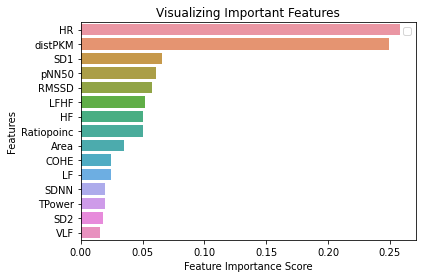

In [10]:
feature_imp = pd.Series(RF.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp
imp1= feature_imp
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [11]:
# Reporte de datos RF
report = classification_report(y_test, y_pred, output_dict=True)
resultadosRF = pd.DataFrame(report).transpose()
resultadosRF['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_pred)
resultadosRF['clasificador']= 'RF'
resultados = cross_val_score(RF, X, y, cv = kfold_validacion)
resultadosRF['Cross Validation']=resultados.mean()
car_imp=feature_imp[0:len(resultadosRF.axes[0])]
resultadosRF['CAR.IMP']= car_imp.index
resultadosRF['n_extimator| maxdepth']= (str(n_estimators) +' | '+ str(max_depth)) 
resultadosRF

,precision,recall,f1-score,support,balanced_accuracy,clasificador,Cross Validation,CAR.IMP,n_extimator| maxdepth
0.0,0.820573,0.977849,0.892334,5327.000000,0.660532,RF,0.738025,HR,100 | 8
1.0,0.912139,0.842949,0.876180,1872.000000,0.660532,RF,0.738025,distPKM,100 | 8
2.0,0.982558,0.160799,0.276370,1051.000000,0.660532,RF,0.738025,SD1,100 | 8
accuracy,0.843152,0.843152,0.843152,0.843152,0.660532,RF,0.738025,pNN50,100 | 8
macro avg,0.905090,0.660532,0.681628,8250.000000,0.660532,RF,0.738025,RMSSD,100 | 8
weighted avg,0.861986,0.843152,0.810198,8250.000000,0.660532,RF,0.738025,LFHF,100 | 8


###Matriz de confusión

[[5241  107    2]
 [ 412 1434    1]
 [ 844   41  144]]


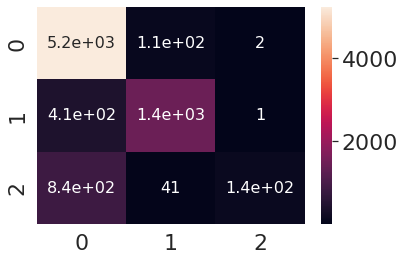

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.set(font_scale=2)
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16})
plt.show()

##SVM

In [12]:
# Hiperparámetros SVM rbf
gamma= 0.7 
C1 = 10
# Hiperparámetros SVM polinomial
degree=3  
C2 = 10
# Hiperparámetros SVM lineal
C3 = 10
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C1).fit(X_train.values, y_train)
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C2).fit(X_train.values, y_train)
lin_svc = svm.LinearSVC(C=C3, max_iter=10000).fit(X_train.values, y_train)

In [13]:
# Resultados del modelo SVM rbf
Z = rbf_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
rbf = pd.DataFrame(report).transpose()
rbf['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
resultados = cross_val_score(rbf_svc, X, y, cv = kfold_validacion)
rbf['Cross Validation'] = resultados.mean()

[[5176  141   10]
 [ 422 1448    2]
 [1015   10   26]]


In [14]:
# Resultados del modelo SVM polinomial
Z = poly_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
poly = pd.DataFrame(report).transpose()
poly['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
resultados = cross_val_score(poly_svc, X, y, cv = kfold_validacion)
poly['Cross Validation'] = resultados.mean()


[[5141  144   42]
 [ 350 1513    9]
 [ 839   12  200]]


In [15]:
# Resultados del modelo SVM lineal
Z = lin_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
lin = pd.DataFrame(report).transpose()
lin['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
resultados = cross_val_score(lin_svc, X, y, cv = kfold_validacion)
lin['Cross Validation'] = resultados.mean()

[[5030  293    4]
 [ 581 1285    6]
 [1046    5    0]]


In [16]:
rbf['C | gamma']=str(C1)+' | '+str(gamma)
poly['C | degree']= str(C2)+' | '+str(degree)
lin['C']= str(C3)

###Caracteristicas mas importantes de SVM

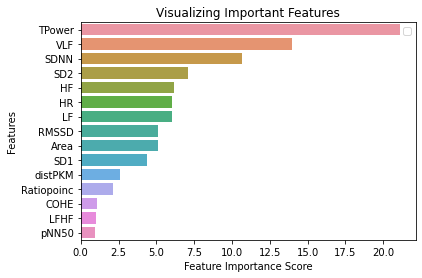

In [17]:
features_svmL=pd.Series(abs(lin_svc.coef_[0]), index=feature_names).sort_values(ascending=False)
imp2=features_svmL
%matplotlib inline
car_imp=features_svmL[0:6]
lin['CAR.IMP']= car_imp.index
# Creating a bar plot
sns.barplot(x=features_svmL, y=features_svmL.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
perm_importance = permutation_importance(rbf_svc, X_test.values, y_test.values)
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
imp3=features[sorted_idx]
imp3=imp3[::-1]
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
rbf['CAR.IMP']= features[sorted_idx][::-1][0:6]
rbf['CAR.IMP']

In [ ]:
perm_importance = permutation_importance(poly_svc, X_test.values, y_test.values)
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
imp4=features[sorted_idx]
imp4=imp4[::-1]
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
poly['CAR.IMP']= features[sorted_idx][::-1][0:6]
poly['CAR.IMP']

In [ ]:
resultadosSVM = pd.concat([rbf,poly,lin], axis=0)
resultadosSVM['clasificador']= ['rbf','rbf','rbf','rbf','rbf','rbf','poly','poly','poly','poly','poly','poly','linear','linear','linear','linear','linear','linear'] 
resultadosSVM

##Red Neuronal


###3 clases

In [ ]:
# Clasificación multiclase
epochsRN =50
neurons = 0 #Neuronas de la capa oculta
# definición del modelo
def baseline_model(neurons):
  # Creación el modelo
  model = Sequential()
  model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
  #model.add(Dense(neurons, activation='relu')) #capa oculta(descomentar si se requiere)
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, neurons = neurons,epochs= epochsRN, verbose=0)
seed = 5
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-36-043bec3bb17b>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, neurons = neurons,epochs= epochsRN, verbose=0)


Accuracy: 78.53% (0.97%)


In [ ]:
#Entrenamiento de la red
estimator.fit(X_train, y_train)

In [ ]:
# Caracteristicas importantes
perm = PermutationImportance(estimator, random_state=1).fit(X_train, y_train)
impFNN=np.argsort(perm.feature_importances_)
features = np.array(feature_names)
imp5=features[impFNN][::-1]

In [ ]:
# Resultados RN
y_pred = estimator.predict(X_test)
report = classification_report(y_test,y_pred, output_dict=True)
resultadosRN = pd.DataFrame()
resultadosRN = pd.DataFrame(report).transpose()
resultadosRN['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_pred)
resultadosRN['CAR.IMP']= features[impFNN][::-1][0:6]
resultadosRN['neurons | epocas'] = str(neurons)+' | '+str(epochsRN)
resultadosRN['clasificador'] = 'RN'
resultadosRN['Cross Validation'] = results.mean()
resultadosRN

258/258 [==============================] - 0s 1ms/step


,precision,recall,f1-score,support,balanced_accuracy,CAR.IMP,neurons | epocas,clasificador,Cross Validation
0.0,0.754701,0.982804,0.853779,5350.000000,0.537413,HR,0 | 50,RN,0.785254
1.0,0.924437,0.622631,0.744096,1847.000000,0.537413,distPKM,0 | 50,RN,0.785254
2.0,0.466667,0.006803,0.013410,1029.000000,0.537413,pNN50,0 | 50,RN,0.785254
accuracy,0.779844,0.779844,0.779844,0.779844,0.537413,Ratiopoinc,0 | 50,RN,0.785254
macro avg,0.715268,0.537413,0.537095,8226.000000,0.537413,LFHF,0 | 50,RN,0.785254
weighted avg,0.756781,0.779844,0.724029,8226.000000,0.537413,SD2,0 | 50,RN,0.785254


#Red Neuronal LSTM

In [ ]:
# Añadir una tercera dimensión a los conjuntos de datos
nmp=X_train.to_numpy()
Xa = np.reshape(nmp, (len(nmp),1,len(feature_names)))
XTa = np.reshape(X_test.values, (len(X_test),1,len(feature_names)))

###3 clases

In [ ]:
# Clasificación multiclase
epochsLSTM =20
# Definición del modelos
def LSTM_model():
  # Creación el modelo
  modelo = Sequential()
  modelo.add(LSTM(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
  modelo.add(Dense(3, activation='softmax'))
  modelo.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
  return modelo
estimatorLSTM = KerasClassifier(build_fn=LSTM_model,epochs= epochsLSTM, verbose=0)
seed = 5
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
resultsLSTM = cross_val_score(estimatorLSTM, Xa, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (resultsLSTM .mean()*100, resultsLSTM .std()*100))

<ipython-input-49-aa40fed38fd7>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimatorLSTM = KerasClassifier(build_fn=LSTM_model,epochs= epochsLSTM, verbose=0)


Accuracy: 26.35% (13.40%)


In [ ]:
# Entrenamiento de la red LSTM
estimatorLSTM.fit(Xa, y_train)

In [ ]:
# Caracterisitcas importantes
CILSTM = []
predLSTM= estimatorLSTM.predict(XTa,verbose=0).squeeze()
baseline_mae = np.mean(np.abs(predLSTM-y_test))         
COLS = list(X_train.columns)
for k in tqdm(range(len(COLS))):
                
  save_col = XTa[:,:,k].copy()
  np.random.shuffle(XTa[:,:,k])
          
  oof_preds = estimatorLSTM.predict(XTa, verbose=0).squeeze() 
  mae = np.mean(np.abs( oof_preds-y_test ))
  CILSTM.append({'feature':COLS[k],'mae':mae})
  XTa[:,:,k] = save_col

  0%|          | 0/15 [00:00<?, ?it/s]

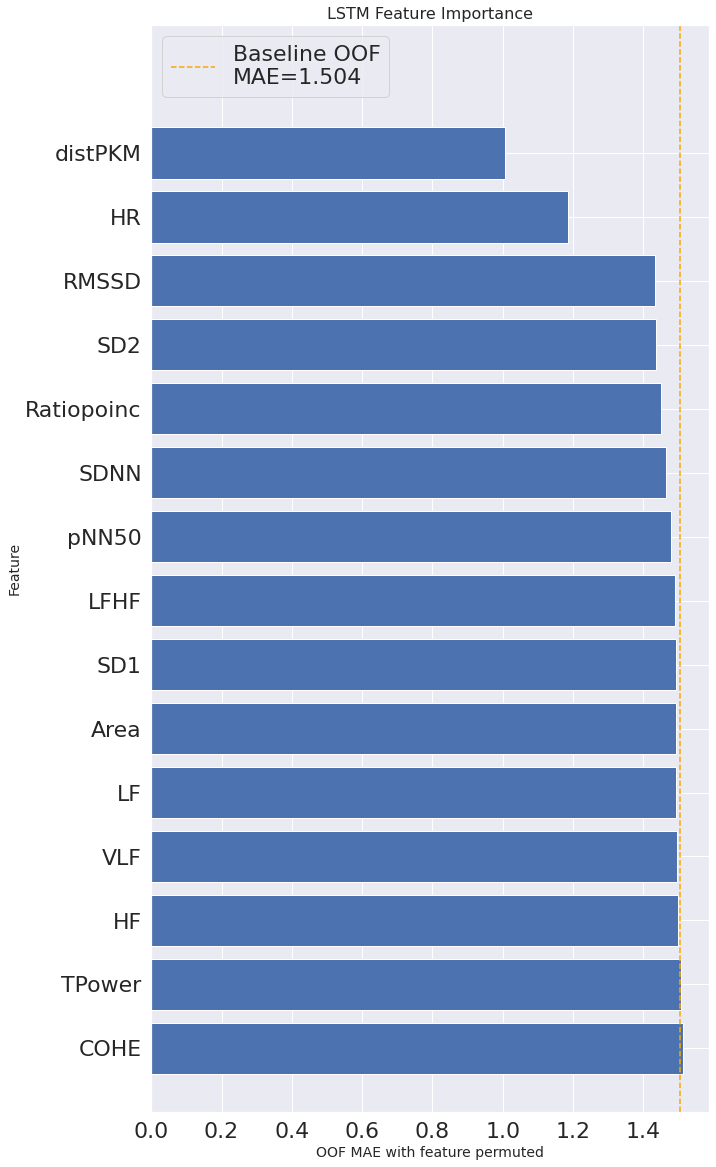

In [ ]:
print()
df = pd.DataFrame(CILSTM)
df = df.sort_values('mae',ascending=False)
imp6=np.array(df['feature'][0::])
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(COLS)),df.mae)
plt.yticks(np.arange(len(COLS)),df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(COLS)+1))
plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
          label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
plt.xlabel(f'OOF MAE with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()

In [ ]:
#Resultados de red LSTM
predLSTM= estimatorLSTM.predict(XTa)
report = classification_report(y_test,predLSTM, output_dict=True)
resultadosRNLSTM = pd.DataFrame()
RNLSTM = pd.DataFrame(report).transpose()
RNLSTM['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,predLSTM)
resultadosRNLSTM = resultadosRNLSTM.append(RNLSTM)
resultadosRNLSTM['CAR.IMP']= np.array(df['feature'][0:6])
resultadosRNLSTM['epocas'] =str(epochsLSTM)
resultadosRNLSTM['Cross Validation'] = resultsLSTM.mean()
resultadosRNLSTM['clasificador'] = 'LSTM'
resultadosRNLSTM

258/258 [==============================] - 0s 2ms/step


,precision,recall,f1-score,support,balanced_accuracy,CAR.IMP,epocas,Cross Validation,clasificador
0.0,0.543860,0.011589,0.022694,5350.000000,0.335614,COHE,20,0.263524,LSTM
1.0,0.031746,0.001083,0.002094,1847.000000,0.335614,TPower,20,0.263524,LSTM
2.0,0.127097,0.994169,0.225380,1029.000000,0.335614,HF,20,0.263524,LSTM
accuracy,0.132142,0.132142,0.132142,0.132142,0.335614,VLF,20,0.263524,LSTM
macro avg,0.234234,0.335614,0.083389,8226.000000,0.335614,LF,20,0.263524,LSTM
weighted avg,0.376740,0.132142,0.043423,8226.000000,0.335614,Area,20,0.263524,LSTM


ADABOOST

In [ ]:
ydf = pd.DataFrame(y_train)
ytestdf = pd.DataFrame(y_test)
# Hiperparámetros
n_estimator= 30
learning_rate= 0.1

AB = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
AB.fit(X_train, y_train)
y_predAB=AB.predict(X_test)

if max(y_test)==2:
  xad = X_train.drop(ydf[ydf['target3']==0].index)
  yad =y_train.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)

  for i in range(0,len(y_predAB),1):
    if y_predAB[i]==1:
      y_predAB[i] = AB2.predict(X_test.loc[[i]])

print(classification_report(y_test, y_predAB))

              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      5350
         1.0       0.88      0.14      0.24      1847
         2.0       0.00      0.00      0.00      1029

    accuracy                           0.68      8226
   macro avg       0.52      0.38      0.35      8226
weighted avg       0.63      0.68      0.57      8226



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


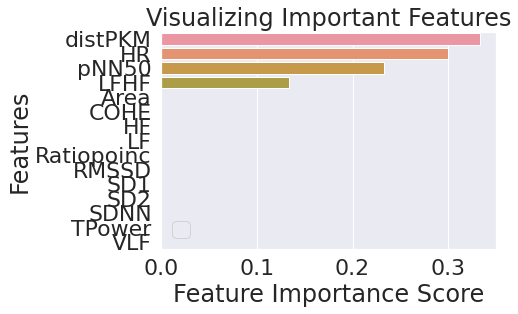

In [ ]:
# Caracteristicas importantes
feature_impAB = pd.Series(AB.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_impAB
imp7=feature_impAB
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_impAB, y=feature_impAB.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Resultados AB
report = classification_report(y_test,y_predAB, output_dict=True)
resultadosAB = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB = resultadosAB.append(rAB)
resultadosAB['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_predAB)
resultadosAB['n_est | learning rate']= str(n_estimator)+' | '+str(learning_rate)
resultadosAB['clasificador']='AB'
resultados = cross_val_score(AB, X, y, cv = kfold_validacion)
resultadosAB['Cross Validation'] = resultados.mean()
car_imp=feature_impAB[0:len(resultadosAB.axes[0])]
resultadosAB['CAR.IMP']= car_imp.index
resultadosAB

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support,balanced_accuracy,n_est | learning rate,clasificador,Cross Validation,CAR.IMP
0.0,0.669564,0.993458,0.799970,5350.000000,0.376812,30 | 0.1,AB,0.671456,distPKM
1.0,0.878472,0.136979,0.237002,1847.000000,0.376812,30 | 0.1,AB,0.671456,HR
2.0,0.000000,0.000000,0.000000,1029.000000,0.376812,30 | 0.1,AB,0.671456,pNN50
accuracy,0.676878,0.676878,0.676878,0.676878,0.376812,30 | 0.1,AB,0.671456,LFHF
macro avg,0.516012,0.376812,0.345657,8226.000000,0.376812,30 | 0.1,AB,0.671456,Area
weighted avg,0.632714,0.676878,0.573497,8226.000000,0.376812,30 | 0.1,AB,0.671456,COHE


### Concatenación de los resultados de los algoritmos con la división de datos 80% - 20%

In [ ]:
resul = pd.concat([resultadosRF, resultadosSVM, resultadosRN,resultadosRNLSTM, resultadosAB], axis=0)
resul.fillna('-')
#resul.to_excel('resultados3_SG_151617.xlsx')

,precision,recall,f1-score,support,balanced_accuracy,clasificador,Cross Validation,CAR.IMP,n_extimator| maxdepth,C | gamma,C | degree,C,neurons | epocas,epocas,n_est | learning rate
0.0,0.806680,0.979626,0.884781,5350.000000,0.631987,RF,0.705908,HR,100 | 8,-,-,-,-,-,-
1.0,0.906448,0.776394,0.836395,1847.000000,0.631987,RF,0.705908,distPKM,100 | 8,-,-,-,-,-,-
2.0,0.979592,0.139942,0.244898,1029.000000,0.631987,RF,0.705908,RMSSD,100 | 8,-,-,-,-,-,-
accuracy,0.828957,0.828957,0.828957,0.828957,0.631987,RF,0.705908,pNN50,100 | 8,-,-,-,-,-,-
macro avg,0.897573,0.631987,0.655358,8226.000000,0.631987,RF,0.705908,SD1,100 | 8,-,-,-,-,-,-
weighted avg,0.850711,0.828957,0.793873,8226.000000,0.631987,RF,0.705908,Ratiopoinc,100 | 8,-,-,-,-,-,-
0.0,0.750356,0.984860,0.851762,5350.000000,0.529296,rbf,0.710163,-,-,10 | 0.7,-,-,-,-,-
1.0,0.924356,0.602057,0.729180,1847.000000,0.529296,rbf,0.710163,-,-,10 | 0.7,-,-,-,-,-
2.0,1.000000,0.000972,0.001942,1029.000000,0.529296,rbf,0.710163,-,-,10 | 0.7,-,-,-,-,-
accuracy,0.775833,0.775833,0.775833,0.775833,0.529296,rbf,0.710163,-,-,10 | 0.7,-,-,-,-,-


### Validación con el sujeto extraido

In [ ]:
#RF
y_pred=RF.predict(X_out)
report = classification_report(y_out, y_pred, output_dict=True)
resultadosRF2 = pd.DataFrame(report).transpose()
resultadosRF2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_pred)

#SVM rbf
Z = rbf_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
rbf2 = pd.DataFrame(report).transpose()
rbf2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM polinomial
Z = poly_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
poly2 = pd.DataFrame(report).transpose()
poly2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM lineal
Z = lin_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
lin2 = pd.DataFrame(report).transpose()
lin2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)

resultadosSVM2 = pd.concat([rbf2,poly2,lin2], axis=0)

#RN
y_pr= estimator.predict(X_out)
report = classification_report(y_out,y_pr, output_dict=True)
resultadosRN2 = pd.DataFrame()
RNeuronal2 = pd.DataFrame(report).transpose()
RNeuronal2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_pr)
resultadosRN2 = resultadosRN2.append(RNeuronal2)

#LSTM
XTa = np.reshape(X_out.values, (len(X_out),1,len(feature_names)))
predLSTM= estimatorLSTM.predict(XTa)
report = classification_report(y_out,predLSTM, output_dict=True)
resultadosRNLSTM2 = pd.DataFrame()
RNLSTM2 = pd.DataFrame(report).transpose()
RNLSTM2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,predLSTM)
resultadosRNLSTM2 = resultadosRNLSTM2.append(RNLSTM2)

#AB
y_predAB=AB.predict(X_out)

if max(y_out)==2:
  xad = X.drop(ydf[ydf['target3']==0].index)
  yad =y.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)
 
  for i in range(0,len(y_predAB)-1,1):
    if y_predAB[i]==1:
       y_predAB[i] = AB2.predict(X_out.loc[[i]])
    
  
report = classification_report(y_out,y_predAB, output_dict=True)
resultadosAB2 = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB2 = resultadosAB2.append(rAB)
    #resultadosSVM = resultadosSVM()
resultadosAB2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_predAB)
resultadosAB2[''] = ''

# Concatenación de los resultados de los algoritmos al validar con el sujeto extraido
result = pd.concat([resultadosRF2, resultadosSVM2, resultadosRN2,resultadosRNLSTM2, resultadosAB2], axis=0)
result.fillna('-')

[[1576  337    0]
 [ 152  521    0]
 [ 357   12    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1881    0   32]
 [ 305  368    0]
 [ 233    0  136]]
[[ 390 1521    2]
 [ 137  467   69]
 [  68  272   29]]
93/93 [==============================] - 0s 2ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support,balanced_accuracy*,
0.0,0.751080,1.000000,0.857848,1913.000000,0.544391,-
1.0,1.000000,0.573551,0.728990,673.000000,0.544391,-
2.0,1.000000,0.059621,0.112532,369.000000,0.544391,-
accuracy,0.785448,0.785448,0.785448,0.785448,0.544391,-
macro avg,0.917027,0.544391,0.566456,2955.000000,0.544391,-
weighted avg,0.838855,0.785448,0.735430,2955.000000,0.544391,-
0.0,0.755875,0.823837,0.788394,1913.000000,0.532661,-
1.0,0.598851,0.774146,0.675308,673.000000,0.532661,-
2.0,0.000000,0.000000,0.000000,369.000000,0.532661,-
accuracy,0.709645,0.709645,0.709645,0.709645,0.532661,-


## Procedimiento de extracción de resultados con las caracteristicas mas importantes extraidas

In [ ]:
numeroCarImp=10 #Numero de caracteristicas mas relevantes con las cuales se va a entrenar
dfimp1=pd.DataFrame(imp1[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})
dfimp2=pd.DataFrame(imp2[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})
dfimp3=pd.DataFrame(imp3[0:numeroCarImp],columns=['Carac'])
dfimp4=pd.DataFrame(imp4[0:numeroCarImp],columns=['Carac'])
dfimp5=pd.DataFrame(imp5[0:numeroCarImp],columns=['Carac'])
dfimp6=pd.DataFrame(imp6[0:numeroCarImp],columns=['Carac'])
dfimp7=pd.DataFrame(imp7[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})

### Lista de caracteristica más relevantes en orden de importancia

In [ ]:
dfCarImp=pd.DataFrame(pd.concat([dfimp1['Carac'],dfimp2['Carac'],dfimp3['Carac'],dfimp4['Carac'],dfimp5['Carac'],dfimp6['Carac'],dfimp7['Carac']],axis=0))
resultadosCar = dfCarImp.value_counts().reset_index()
CaracCo=list(resultadosCar['Carac'][0:numeroCarImp])
CaracCo

['LFHF',
 'pNN50',
 'HR',
 'distPKM',
 'COHE',
 'RMSSD',
 'Ratiopoinc',
 'SDNN',
 'Area',
 'LF']

In [ ]:
# Creación de los nuevos conjuntos de entrenamiento con las caracteristicas mas importantes
X_train2=X_train[CaracCo].copy()
X_out2=X_out[CaracCo].copy()

Entrenamiento y validación de los algoritmos

In [ ]:
#RF
RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
RF.fit(X_train2,y_train)
y_pred=RF.predict(X_out2)
report = classification_report(y_out, y_pred, output_dict=True)
resultadosRF3 = pd.DataFrame(report).transpose()
resultadosRF3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_pred)

#SVM 
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C1).fit(X_train2.values, y_train)
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C2).fit(X_train2.values, y_train)
lin_svc = svm.LinearSVC(C=C3, max_iter=10000).fit(X_train2.values, y_train)

#SVM rbf
Z = rbf_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
rbf3 = pd.DataFrame(report).transpose()
rbf3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM polinomial
Z = poly_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
poly3 = pd.DataFrame(report).transpose()
poly3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM lineal
Z = lin_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
lin3 = pd.DataFrame(report).transpose()
lin3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)

resultadosSVM3 = pd.concat([rbf3,poly3,lin3], axis=0)

#RN
def baseline_model(neurons):
  # crea el modelo
  model = Sequential()
  model.add(Dense(X_train2.shape[1], input_dim=X_train2.shape[1], activation='relu'))
  #model.add(Dense(neurons, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  # Compile el modelo
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, neurons = neurons,epochs= epochsRN, verbose=0)
estimator.fit(X_train2, y_train)
y_pr= estimator.predict(X_out2)
report = classification_report(y_out,y_pr, output_dict=True)
resultadosRN3 = pd.DataFrame()
RNeuronal3 = pd.DataFrame(report).transpose()
RNeuronal3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_pr)
resultadosRN3 = resultadosRN3.append(RNeuronal3)

#LSTM
nmp=X_train2.to_numpy()
Xa = np.reshape(nmp, (len(nmp),1,numeroCarImp))
XTa = np.reshape(X_out2.values, (len(X_out2),1,numeroCarImp))
def LSTM_model():
  # crea el modelo
  modelo = Sequential()
  modelo.add(LSTM(X_train2.shape[1], input_dim=X_train2.shape[1], activation='relu'))
  modelo.add(Dense(3, activation='softmax'))
  modelo.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
  # Compile el modelo
  return modelo
estimatorLSTM = KerasClassifier(build_fn=LSTM_model,epochs= epochsLSTM, verbose=0)
estimatorLSTM.fit(Xa, y_train)
predLSTM= estimatorLSTM.predict(XTa)
report = classification_report(y_out,predLSTM, output_dict=True)
resultadosRNLSTM3 = pd.DataFrame()
RNLSTM3 = pd.DataFrame(report).transpose()
RNLSTM3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,predLSTM)
resultadosRNLSTM3 = resultadosRNLSTM3.append(RNLSTM3)

#AB

AB = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
AB.fit(X_train2, y_train)

y_predAB=AB.predict(X_out2)

if max(y_out)==2:
  xad = X_train2.drop(ydf[ydf['target3']==0].index)
  yad =y_train.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)

 
  for i in range(0,len(y_predAB)-1,1):
    if y_predAB[i]==1:
       y_predAB[i] = AB2.predict(X_out2.loc[[i]])
    
report = classification_report(y_out,y_predAB, output_dict=True)
resultadosAB3 = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB3 = resultadosAB3.append(rAB)
resultadosAB3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_predAB)

# Concatenación de los resultados de los algoritmos al validar con el sujeto extraido y caracteristicas reducidas
result2 = pd.concat([resultadosRF3, resultadosSVM3, resultadosRN3,resultadosRNLSTM3, resultadosAB3], axis=0)
result2.fillna('-')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1563  350    0]
 [ 262  411    0]
 [ 351   18    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1599    0  314]
 [ 247  376   50]
 [ 154    4  211]]
[[ 408 1504    1]
 [  84  468  121]
 [  80  277   12]]


<ipython-input-81-9d81ee8dea59>:50: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, neurons = neurons,epochs= epochsRN, verbose=0)


93/93 [==============================] - 1s 7ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-81-9d81ee8dea59>:71: DeprecationWarning: KerasClassi

93/93 [==============================] - 2s 17ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support,balanced_accuracy**
0.0,0.746391,1.000000,0.854781,1913.000000,0.527489
1.0,1.000000,0.582467,0.736150,673.000000,0.527489
2.0,0.000000,0.000000,0.000000,369.000000,0.527489
accuracy,0.780034,0.780034,0.780034,0.780034,0.527489
macro avg,0.582130,0.527489,0.530310,2955.000000,0.527489
weighted avg,0.710946,0.780034,0.721024,2955.000000,0.527489
0.0,0.718290,0.817041,0.764490,1913.000000,0.475913
1.0,0.527599,0.610698,0.566116,673.000000,0.475913
2.0,0.000000,0.000000,0.000000,369.000000,0.475913
accuracy,0.668020,0.668020,0.668020,0.668020,0.475913


##Unión de todos los resultados

In [ ]:
Final_res = pd.concat([resul,result,result2], axis=1)
Final_res.fillna('-')

# Guardar archivo de datos

In [ ]:
Final_res.to_excel('S16tri_C18_A.xlsx')